Algoritmo de Grover usando pulsos: Variando la amplitud

Procederemos a utilizar los recursos de Qiskit Pulse para calibrar el circuito y sus compuertas
con el fin de obtener resultados más precisos a la hora de simular los algoritmos
en los qiskit.providers dados y así obtener resultados fieles que nos permitan comparar
con los que obtuvimos anteriormente sin usar pulsos.

La estructura a la hora de aplicar los pulsos será la siguiente:
    Considerando que tendremos tres variaciones (variaciones de Sigma), estructuradas (Tiempo, amplitud, Sigma) tal que
    1) 100ns amp=0.1 Sigma=100/3 (33.33)
    2) 100ns amp=0.3 Sigma=100/3 (33.33)
    3) 100ns amp=2 Sigma=100/3 (33.33)
    
   Cada una de las variaciones serán aplicadas al circuito y se calibra según tal pulso y luego de ello
    se procederá a simular cada una en los simuladores:
        -FakeManila
        -FakeOpenPulse3Q
        
   Dicho esto podemos proceder

Importamos las librerías necesarias para el desarrollo, entre ellos los qiskit.providers
así como los recursos "pulse" y "transpile", también para la visualización del pulso 
se importa "Gaussian"

A partir de aquí las instrucciones son análogas al notebook: Algoritmo de Grover con Pulsos #2
por tal razón y a manera de simplificar obviaremos el detalle de los pasos.

In [1]:
import numpy as np
import math
import qiskit as qiskit
from numpy import sqrt
from random import randint
from qiskit import *
from qiskit import Aer, QuantumCircuit, IBMQ, execute, quantum_info, transpile
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor
from qiskit.providers.fake_provider import FakeOpenPulse2Q, FakeOpenPulse3Q, FakeManila, FakeValencia, FakeHanoi
from qiskit import pulse, transpile
from qiskit.pulse.library import Gaussian

#Compuertas personalizadas
from qiskit.circuit import Gate
from qiskit import QiskitError

#informacion
import qiskit.tools.jupyter

provider = IBMQ.load_account()
belem = provider.get_backend('ibmq_belem') 
print('se ha ejecutado correctamente')


se ha ejecutado correctamente


1) Características del pulso: 100ns amp=0.1 Sigma=100/3
(Recordemos que este puslo se ejecutará en los servidores ya establecidos arriba)

Ejecutando en backend=FakeManila

In [2]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


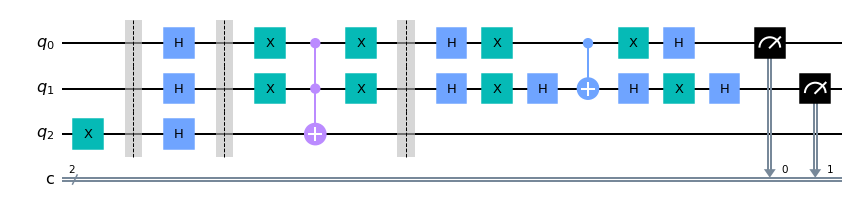

In [3]:
#Simulador de prueba FakeManila
backend = FakeManila() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


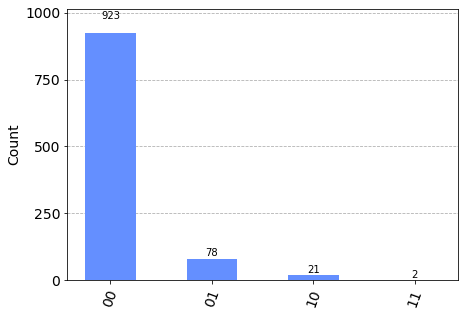

In [4]:
result = execute(circ, backend=FakeManila()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [5]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

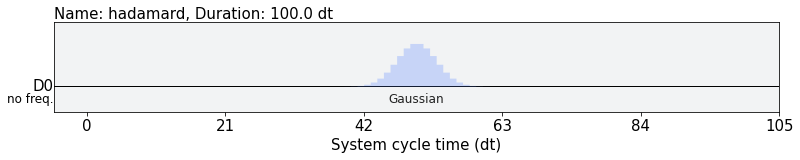

In [6]:
h_q0.draw()

In [7]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=33.33), pulse.drive_channel(0))

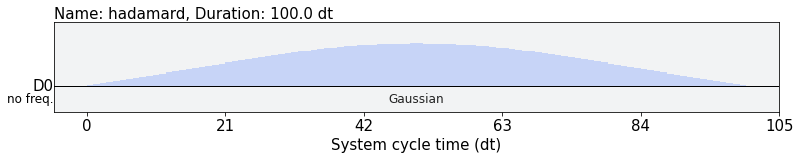

In [8]:
h_q0.draw()

In [9]:
circ.add_calibration( 'h', [0], h_q0)
circ.add_calibration( 'x', [0], h_q0)
circ.add_calibration( 'cx',[0], h_q0)
circ.add_calibration( 'sx',[0], h_q0)
circ.add_calibration( 'id',[0], h_q0)
circ.add_calibration( 'rz',[0], h_q0)
circ.add_calibration( 'reset',[0], h_q0)


['id', 'rz', 'sx', 'x', 'cx', 'reset']


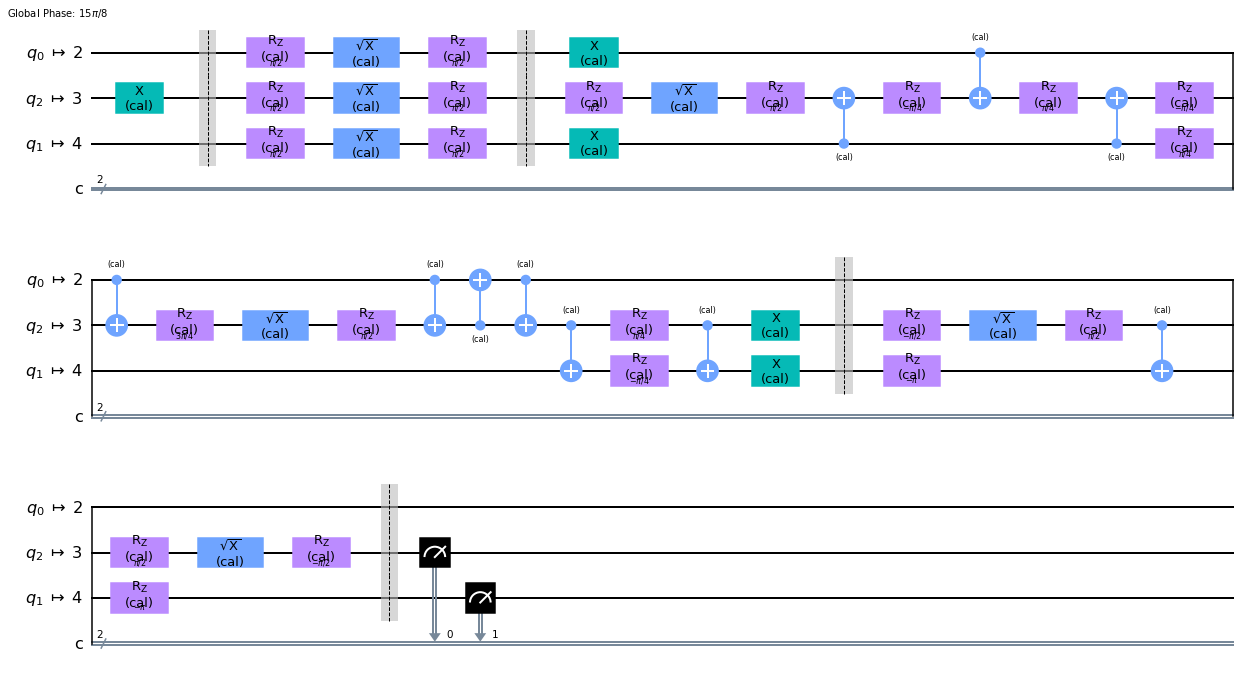

In [10]:
backend = FakeManila()

circ1 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ1.draw('mpl', idle_wires=False)

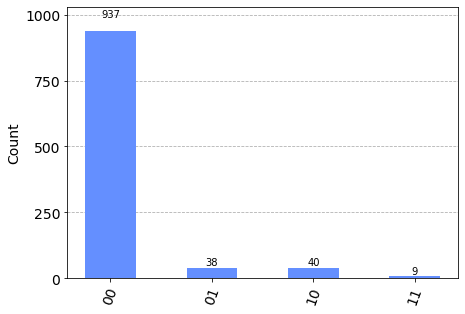

In [11]:
result = execute(circ1, backend=FakeManila()).result();
job = backend.run(circ1)
counts = job.result().get_counts()
plot_histogram(counts)

Ejecutando en backend=FakeOpenPulse3Q

In [43]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


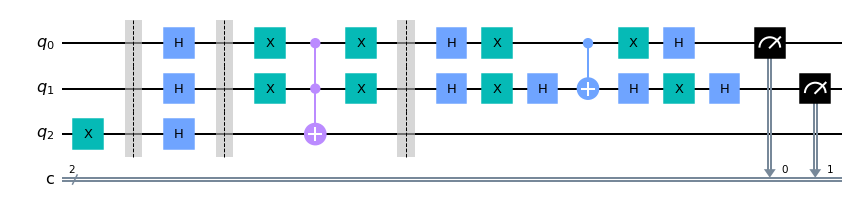

In [44]:
#Simulador de prueba FakeOpenPulse3Q
backend = FakeOpenPulse3Q() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


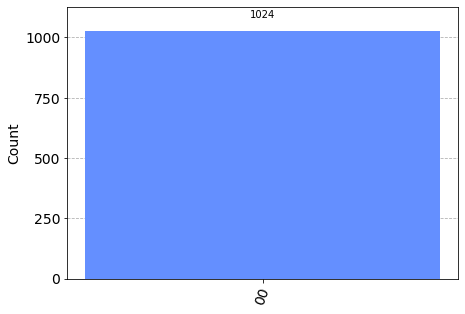

In [45]:
result = execute(circ, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [46]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

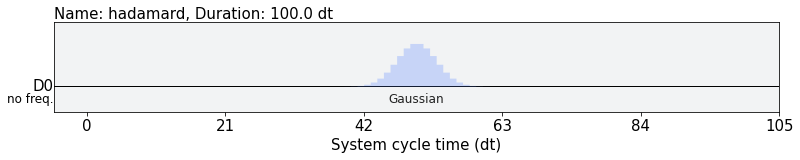

In [47]:
h_q1.draw()

In [48]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.3, sigma=33.33), pulse.drive_channel(0))

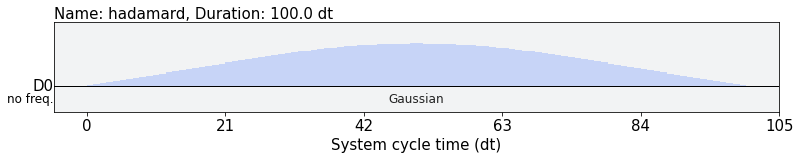

In [49]:
h_q1.draw()

In [50]:
circ.add_calibration( 'h', [0], h_q1)
circ.add_calibration( 'x', [0], h_q1)
circ.add_calibration( 'cx',[0], h_q1)
circ.add_calibration( 'sx',[0], h_q1)
circ.add_calibration( 'id',[0], h_q1)
circ.add_calibration( 'rz',[0], h_q1)
circ.add_calibration( 'reset',[0], h_q1)


['u1', 'u2', 'u3', 'cx', 'id']


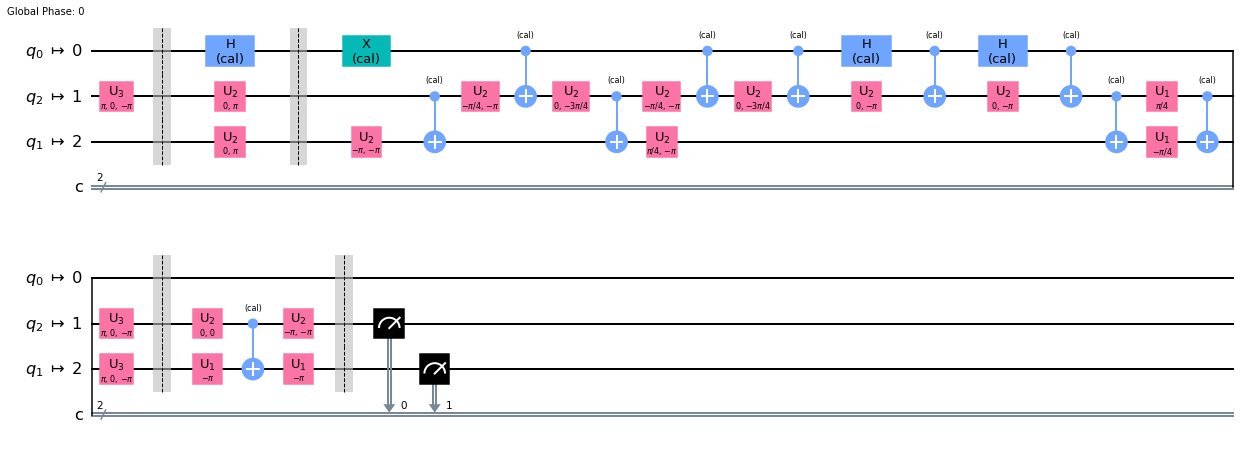

In [51]:
backend = FakeOpenPulse3Q()

circ2 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ2.draw('mpl', idle_wires=False)

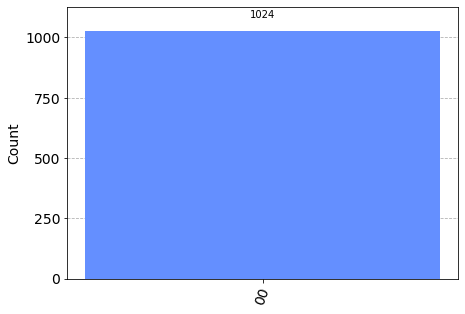

In [52]:
result = execute(circ2, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ2)
counts = job.result().get_counts()
plot_histogram(counts)

2) Características del pulso: 100ns amp=0.3 Sigma=100/3
(Recordemos que este puslo se ejecutará en los servidores ya establecidos arriba)

Ejecutando en backend=FakeManila

In [23]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


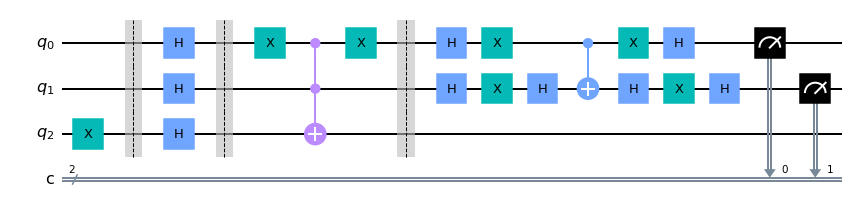

In [24]:
#Simulador de prueba FakeManila
backend = FakeManila() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


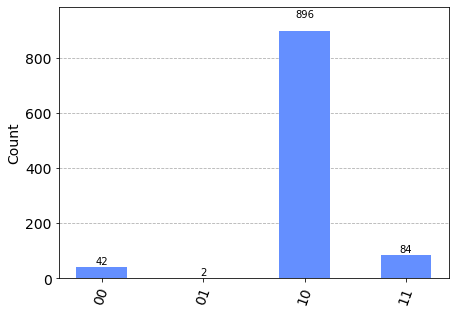

In [25]:
result = execute(circ, backend=FakeManila()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [26]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

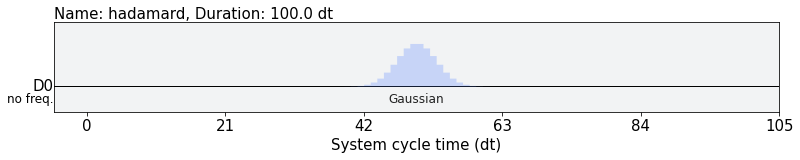

In [27]:
h_q0.draw()

In [28]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.3, sigma=33.33), pulse.drive_channel(0))

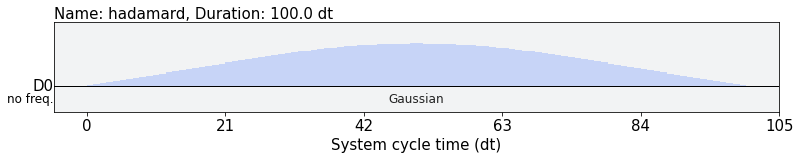

In [29]:
h_q0.draw()

In [30]:
circ.add_calibration( 'h', [0], h_q0)
circ.add_calibration( 'x', [0], h_q0)
circ.add_calibration( 'cx',[0], h_q0)
circ.add_calibration( 'sx',[0], h_q0)
circ.add_calibration( 'id',[0], h_q0)
circ.add_calibration( 'rz',[0], h_q0)
circ.add_calibration( 'reset',[0], h_q0)


['id', 'rz', 'sx', 'x', 'cx', 'reset']


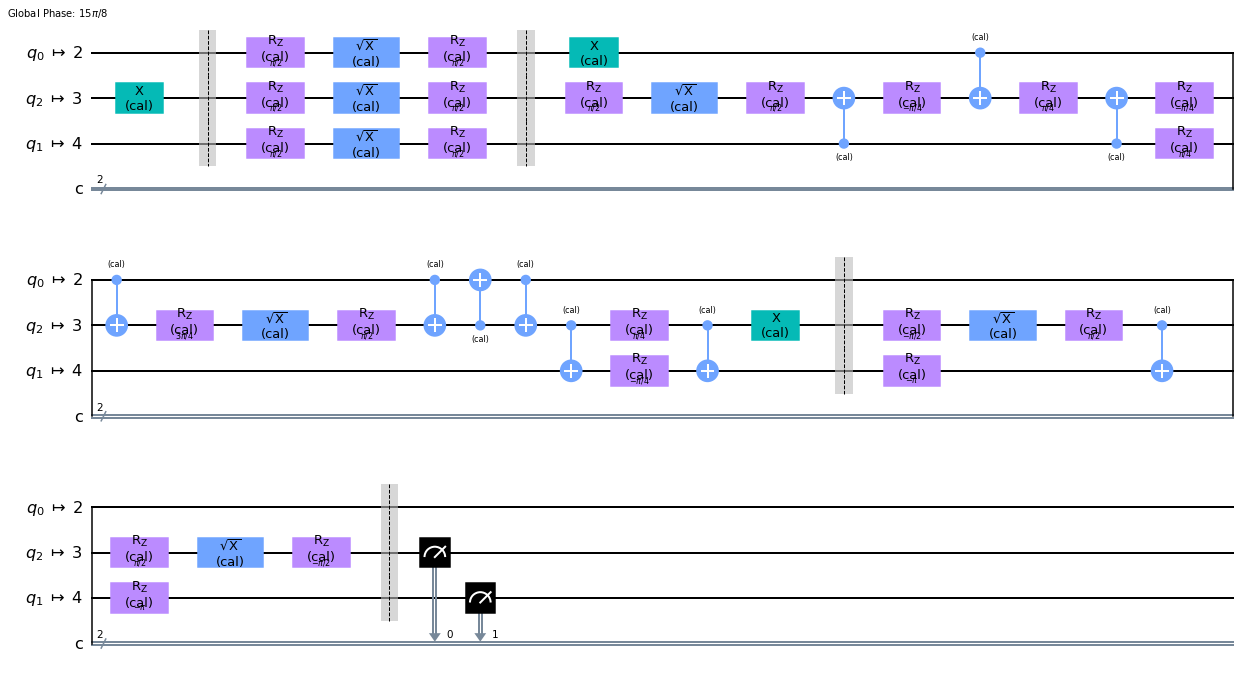

In [31]:
backend = FakeManila()

circ1 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ1.draw('mpl', idle_wires=False)

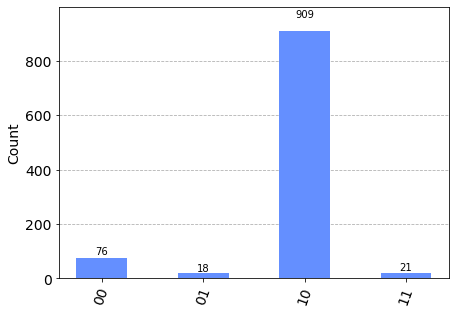

In [32]:
result = execute(circ1, backend=FakeManila()).result();
job = backend.run(circ1)
counts = job.result().get_counts()
plot_histogram(counts)

Ejecutando en backend=FakeOpenPulse3Q

In [33]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


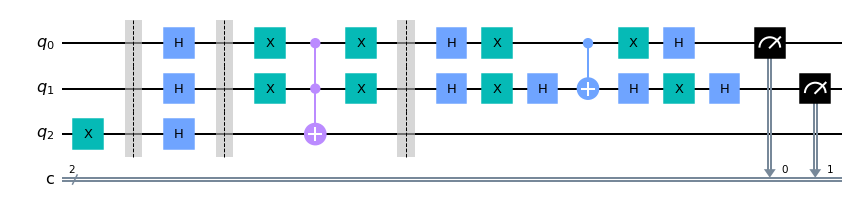

In [34]:
#Simulador de prueba FakeOpenPulse3Q
backend = FakeOpenPulse3Q() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


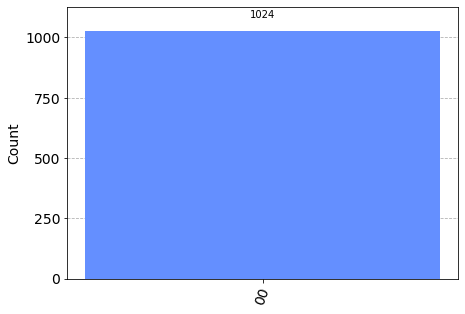

In [35]:
result = execute(circ, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [36]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

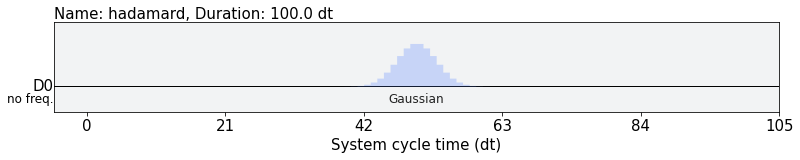

In [37]:
h_q1.draw()

In [38]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.3, sigma=33.33), pulse.drive_channel(0))

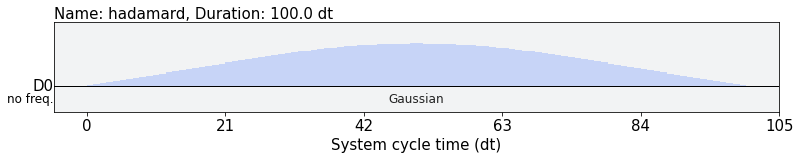

In [39]:
h_q1.draw()

In [40]:
circ.add_calibration( 'h', [0], h_q1)
circ.add_calibration( 'x', [0], h_q1)
circ.add_calibration( 'cx',[0], h_q1)
circ.add_calibration( 'sx',[0], h_q1)
circ.add_calibration( 'id',[0], h_q1)
circ.add_calibration( 'rz',[0], h_q1)
circ.add_calibration( 'reset',[0], h_q1)


['u1', 'u2', 'u3', 'cx', 'id']


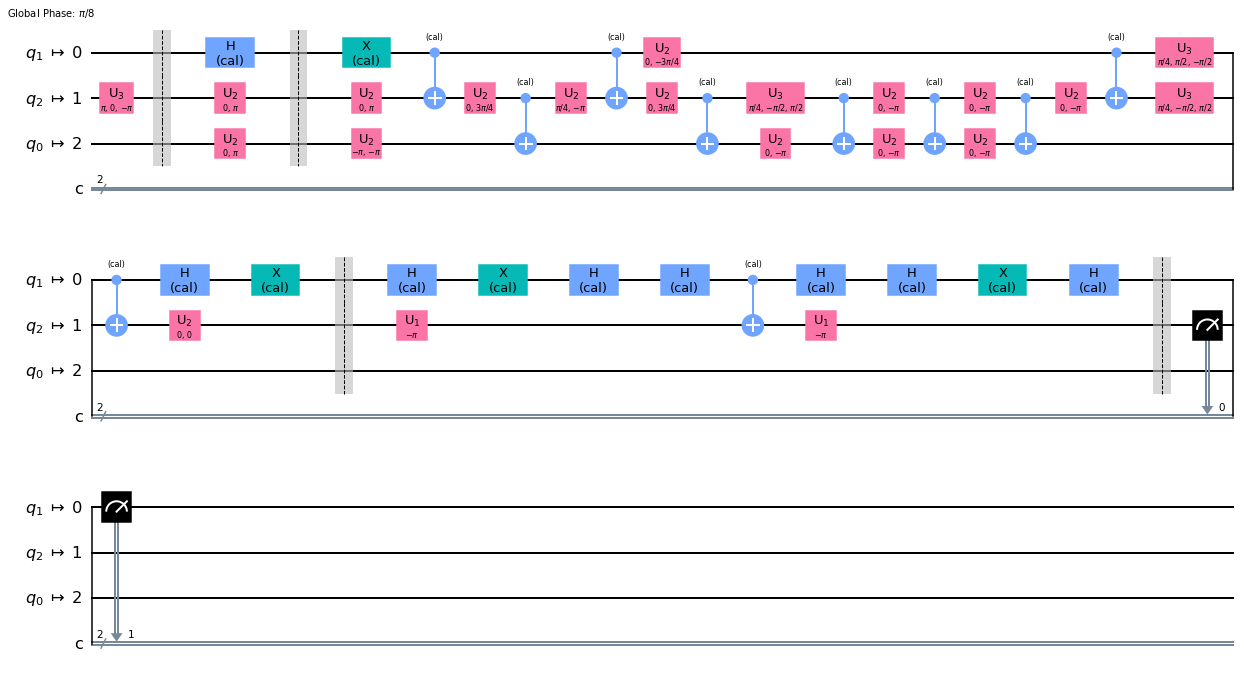

In [41]:
backend = FakeOpenPulse3Q()

circ2 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ2.draw('mpl', idle_wires=False)

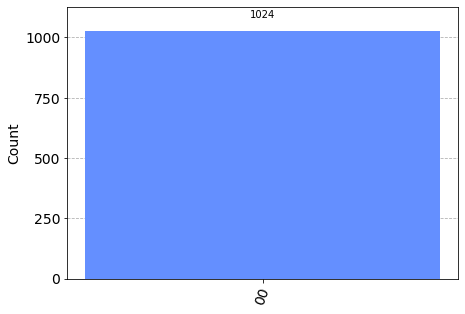

In [53]:
result = execute(circ2, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ2)
counts = job.result().get_counts()
plot_histogram(counts)

3) Características del pulso: 100ns amp=2 Sigma=100/3
(Recordemos que este puslo se ejecutará en los servidores ya establecidos arriba)

Ejecutando en backend=FakeManila

In [54]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


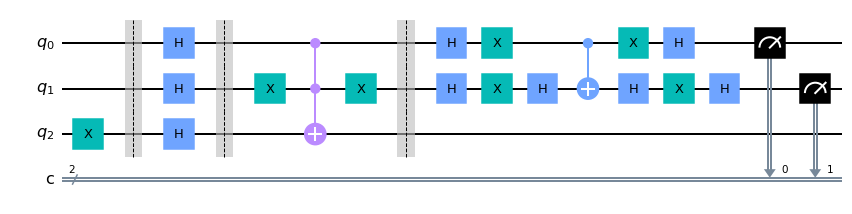

In [55]:
#Simulador de prueba FakeManila
backend = FakeManila() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


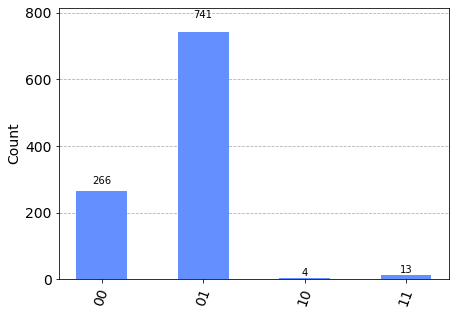

In [56]:
result = execute(circ, backend=FakeManila()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [57]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

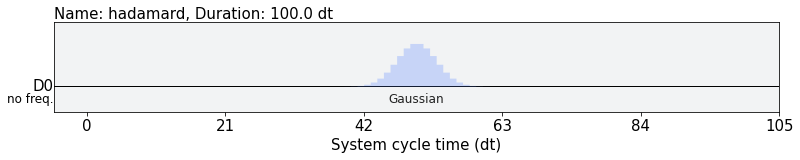

In [58]:
h_q0.draw()

In [62]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

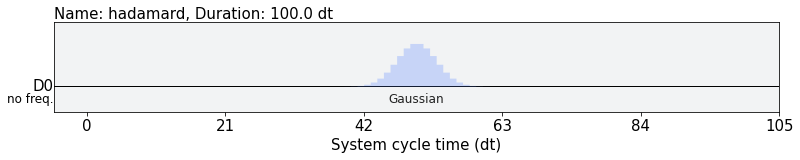

In [63]:
h_q0.draw()

In [65]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=1, sigma=33.33), pulse.drive_channel(0))

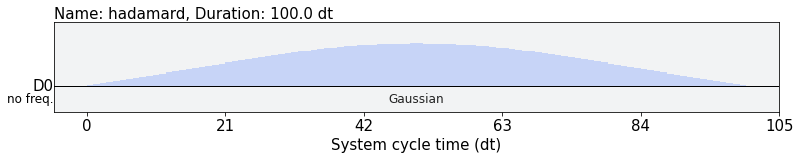

In [66]:
h_q0.draw()

In [67]:
circ.add_calibration( 'h', [0], h_q0)
circ.add_calibration( 'x', [0], h_q0)
circ.add_calibration( 'cx',[0], h_q0)
circ.add_calibration( 'sx',[0], h_q0)
circ.add_calibration( 'id',[0], h_q0)
circ.add_calibration( 'rz',[0], h_q0)
circ.add_calibration( 'reset',[0], h_q0)


['id', 'rz', 'sx', 'x', 'cx', 'reset']


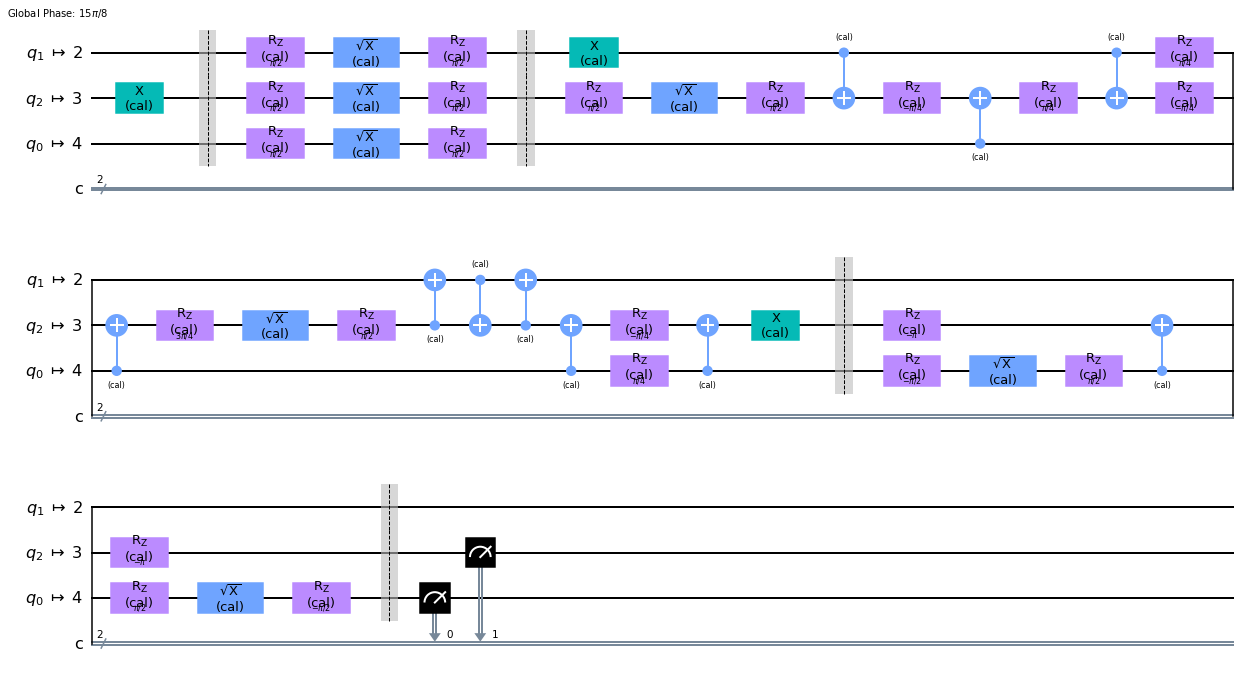

In [68]:
backend = FakeManila()

circ1 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ1.draw('mpl', idle_wires=False)

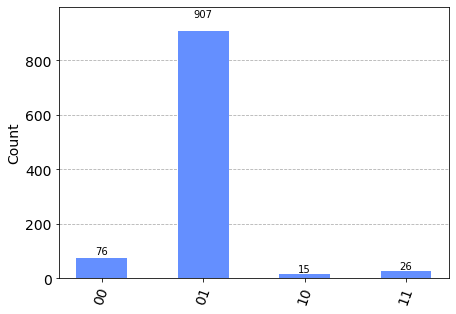

In [69]:
result = execute(circ1, backend=FakeManila()).result();
job = backend.run(circ1)
counts = job.result().get_counts()
plot_histogram(counts)

Ejecutando en backend=FakeOpenPulse3Q

In [70]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


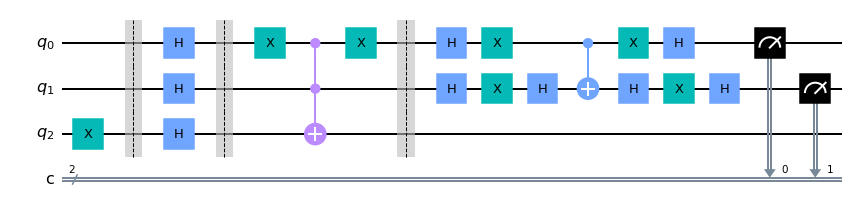

In [71]:
#Simulador de prueba FakeOpenPulse3Q
backend = FakeOpenPulse3Q() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


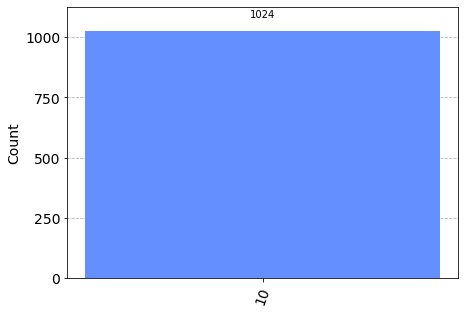

In [72]:
result = execute(circ, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [73]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

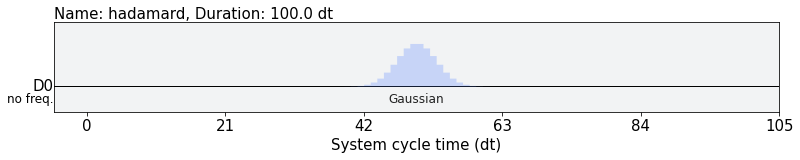

In [74]:
h_q1.draw()

In [75]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=1, sigma=33.33), pulse.drive_channel(0))

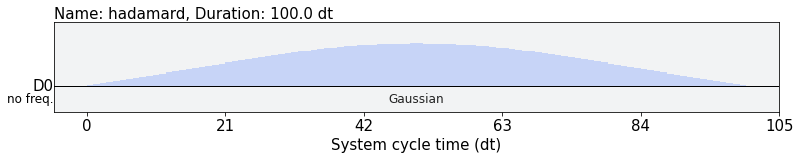

In [76]:
h_q1.draw()

In [77]:
circ.add_calibration( 'h', [0], h_q1)
circ.add_calibration( 'x', [0], h_q1)
circ.add_calibration( 'cx',[0], h_q1)
circ.add_calibration( 'sx',[0], h_q1)
circ.add_calibration( 'id',[0], h_q1)
circ.add_calibration( 'rz',[0], h_q1)
circ.add_calibration( 'reset',[0], h_q1)


['u1', 'u2', 'u3', 'cx', 'id']


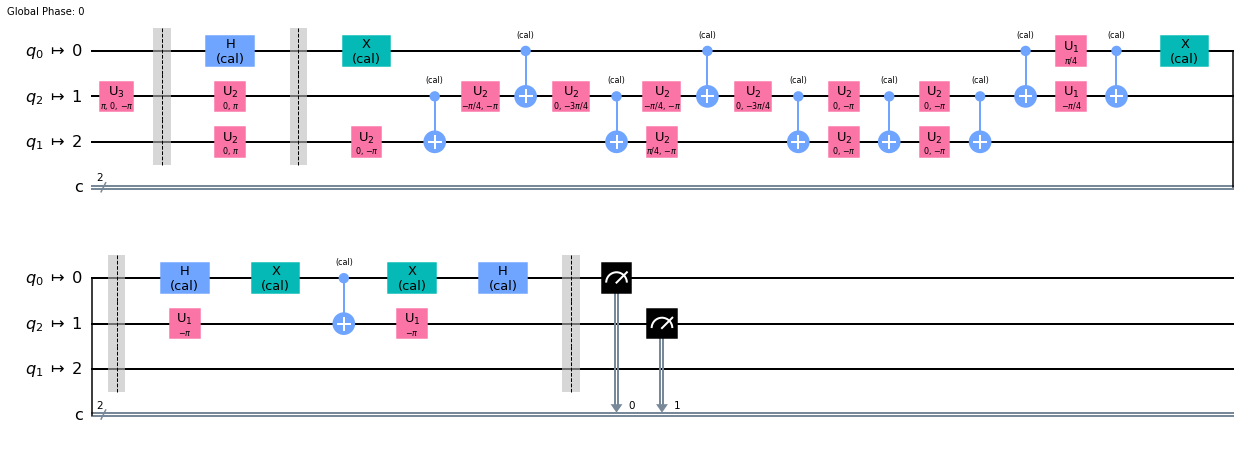

In [78]:
backend = FakeOpenPulse3Q()

circ2 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ2.draw('mpl', idle_wires=False)

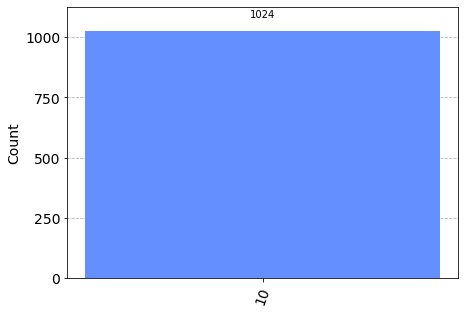

In [79]:
result = execute(circ2, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ2)
counts = job.result().get_counts()
plot_histogram(counts)